In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [19]:
C_M     = 10        #nF/mm^2

### Initial Values
V_INIT  = -65       #mV
M_INIT  = 0.0529
H_INIT  = 0.5961
N_INIT  = 0.3177

### Maximal Conductance
G_L     = 0.003
G_NA    = 1.2
G_K     = 0.36
E_L     = -54.387
E_K     = -77
E_NA    = 50

DT      = 0.01
TOTAL   = 100

In [21]:
def HudgkinHuxleyModel(I_c2A, T=TOTAL, dt = DT, 
                       V_init=V_INIT, m_init=M_INIT, h_init=H_INIT, n_init=N_INIT,
                       c_m=C_M, g_l=G_L, g_na=G_NA, g_k=G_K, E_l=E_L, E_k=E_K, E_na=E_NA):
    N = int(T/DT)
    V = np.zeros(N);     V[0]=V_init
    i_m = np.zeros(N)
    '''
    alpha_n = np.zero(N); alpha_n[0]=Alpha_N(V_init)
    beta_n = np.zero(N); beta_n[0]=Beta_N(V_init)
    alpha_m = np.zero(N); alpha_m[0]=Alpha_M(V_init)
    beta_m = np.zero(N); beta_m[0]=Beta_M(V_init)
    alpha_h = np.zero(N); alpha_h[0]=Alpha_H(V_init)
    beta_h = np.zero(N); beta_h[0]=Beta_H(V_init)
    '''
    tau_n = np.zeros(N)     
    n_infty = np.zeros(N)  
    tau_m = np.zeros(N)    
    m_infty = np.zeros(N)
    tau_h = np.zeros(N)   
    h_infty = np.zeros(N)  

    n = np.zeros(N);         n[0]=n_init
    m = np.zeros(N);         m[0]=m_init
    h = np.zeros(N);         h[0]=h_init

    for i in range(N-1):
        tau_n[i] = Tau_X(Alpha_N(V[i]), Beta_N(V[i]))
        n_infty[i] = X_Infty(Alpha_N(V[i]), Beta_N(V[i]))
        tau_m[i] = Tau_X(Alpha_M(V[i]), Beta_M(V[i]))
        m_infty[i] = X_Infty(Alpha_M(V[i]), Beta_M(V[i]))
        tau_h[i] = Tau_X(Alpha_H(V[i]), Beta_H(V[i]))
        h_infty[i] = X_Infty(Alpha_H(V[i]), Beta_H(V[i]))

        n[i+1] = n[i] + (dt/tau_n[i])*(n_infty[i]-n[i])
        m[i+1] = m[i] + (dt/tau_m[i])*(m_infty[i]-m[i])
        h[i+1] = h[i] + (dt/tau_h[i])*(h_infty[i]-h[i])

        i_m[i+1] = g_l*(V[i]-E_l) + g_k*math.pow(n[i+1],4)*(V[i]-E_k) + g_na*math.pow(m[i+1],3)*h[i+1]*(V[i]-E_na)
        V[i+1] = V[i] + (dt/c_m)*(-1*i_m[i+1] + I_c2A)
    
    return V, n, m, h #, tau_n, tau_m, tau_h, n_infty, m_infty, h_infty



def Alpha_N(V):
    return 0.1*(V+55)/(1-math.exp(-0.1*(V+55)))

def Beta_N(V):
    return 0.125*math.exp(-0.0125*(V+65))

def Alpha_M(V):
    return 0.1*(V+40)/(1-math.exp(-0.1*(V+40)))

def Beta_M(V):
    return 4*math.exp(-0.0556*(V+65))

def Alpha_H(V):
    return 0.07*math.exp(-0.05*(V+65))

def Beta_H(V):
    return 1/(1-math.exp(-0.1*(V+35)))


def Tau_X(Alpha, Beta):
    return 1/(Alpha+Beta)

def X_Infty(Alpha, Beta):
    return Alpha/(Alpha+Beta)

a) Use an external current with Ie/A = 200 nA/mm2 and plot V, m, h, and n as functions of time for a suitable interval.

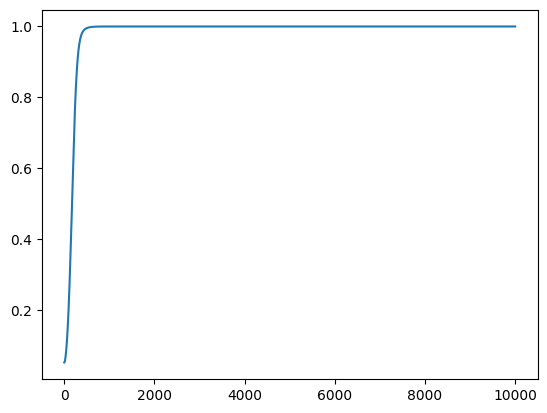

In [25]:
V, m, h, n = HudgkinHuxleyModel(200)

plt.plot(h)

b) Plot the firing rate of the model as a function of Ie/A over the range from 0 to 500nA/mm2.

c) Apply a pulse of negative current with Ie/A = −50 nA/mm2 for 5 ms followed by Ie/A = 0 and show what happens. Why does this occur?